# Housing Analysis

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [44]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Part 1: Descriptive Statistics and Visualizations

**1. Boxplot of Median value of owner-occupied homes**

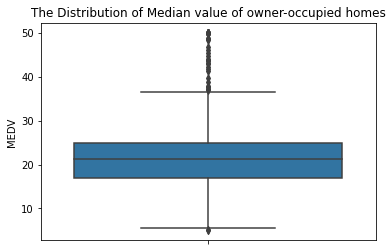

In [92]:
ax = sns.boxplot(y='MEDV', data=boston_df).set(title='The Distribution of Median value of owner-occupied homes')

**2. Histogram of the Charles river variable**

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


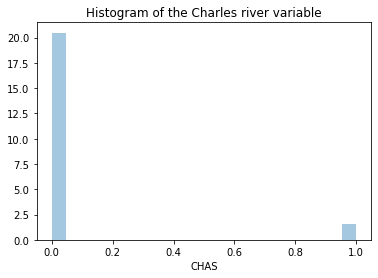

In [93]:
ax = sns.distplot(boston_df['CHAS']).set(title='Histogram of the Charles river variable')

**3. Boxplot of the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [99]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE']< 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

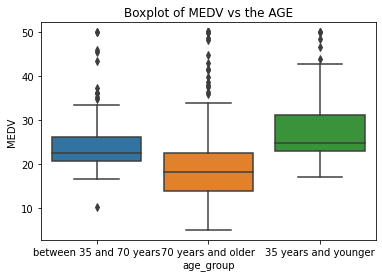

In [104]:
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df).set(title='Boxplot of MEDV vs the AGE')

**4. Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

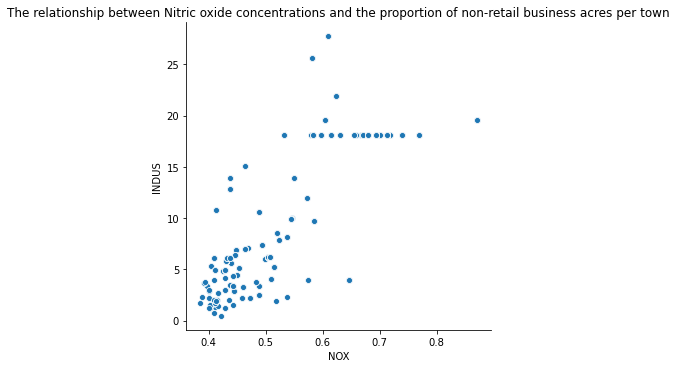

In [95]:
sns.relplot(x="NOX", y="INDUS", data=boston_df).set(title='The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

**5. Histogram of the pupil to teacher ratio variable**

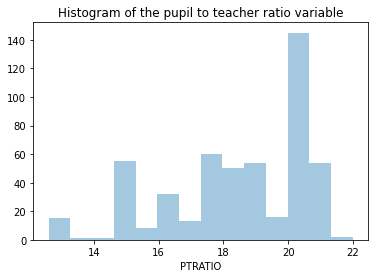

In [96]:
ax = sns.distplot(boston_df['PTRATIO'], kde= False).set(title='Histogram of the pupil to teacher ratio variable')

## Part 2: Analysis

**Use α = 0.05 as a standard to the following analyses**

**Q1:Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

H0:µ1=µ2  ("there is no difference in median value of houses bounded by the Charles river or not")

H1:µ1≠µ2  ("there is a difference in median value of houses bounded by the Charles river or not")

In [91]:
scipy.stats.levene(boston_df[boston_df['CHAS']== 1]['MEDV'],
                  boston_df[boston_df['CHAS']== 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05, the variance are not equal.

In [55]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']== 1]['MEDV'],
                     boston_df[boston_df['CHAS']== 0]['MEDV'], equal_var= False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not.

**Q2:Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

H0:µ1=µ2  ("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")

H1:µ1≠µ2  ("there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")

In [58]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE']< 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [62]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')

LeveneResult(statistic=3.0334146578476546, pvalue=0.049065505638078565)

Since the p-value is less than 0.05, the variance are not equal.

In [65]:
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_to_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [68]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_to_seventy, seventy_older)
print("F_statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_statistic: 34.871980127572854, P-Value: 7.078159377148967e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) differ.

**Q3:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

H0:µ1=µ2  ("there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

H1:µ1≠µ2  ("there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

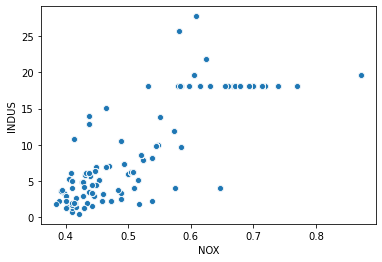

In [71]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [72]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Conclusion: Since the p-value < 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**Q4:What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

H0:β1 = 0 (additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)

H1:β1 is not equal to 0 (additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)

In [78]:
X = boston_df['DIS']
y = boston_df['MEDV']
X =sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        04:37:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: Since p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median value of owner occupied homes on additional weighted distance to the five Boston employment centres. The coefficient 1.0916 means that additional weighted distance to the five Boston employment centres get 1.0916 scores more than additional weighted distance to other Boston employment centres.